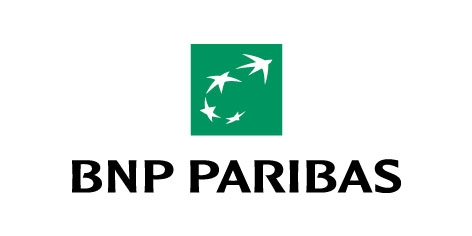

# PROYECTO: BNP PARIBAS CARDIF CLAIMS MANAGEMENT

Blanca Ubaque - 201725992		
Carolina Trespalacios - 200313688		
Santiago Barco - 200913781		
Rafael Niño - 200522388		

# DESCRIPCIÓN

As a global specialist in personal insurance, BNP Paribas Cardif serves 90 million clients in 36 countries across Europe, Asia and Latin America.

In a world shaped by the emergence of new uses and lifestyles, everything is going faster and faster. When facing unexpected events, customers expect their insurer to support them as soon as possible. However, claims management may require different levels of check before a claim can be approved and a payment can be made. With the new practices and behaviors generated by the digital economy, this process needs adaptation thanks to data science to meet the new needs and expectations of customers.

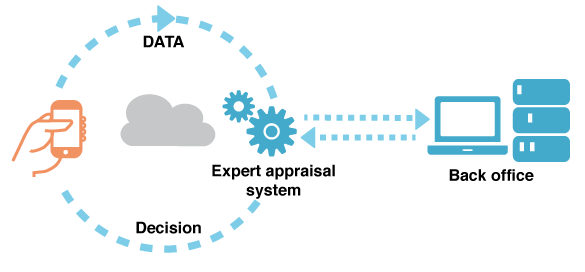

In this challenge, BNP Paribas Cardif is providing an anonymized database with two categories of claims:

- claims for which approval could be accelerated leading to faster payments
- claims for which additional information is required before approval

We are challenged to predict the category of a claim based on features available early in the process, helping BNP Paribas Cardif accelerate its claims process and therefore provide a better service to its customers.

# DATA PRE-PROCESSING

In [35]:
# Instalación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Lectura de la data
data = pd.read_csv('data.csv', sep=',',na_values=[''],header=0)

In [37]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


# Análisis de missing data y limpieza de datos

In [38]:
# check for missing values
data.isnull().sum()

ID            0
target        0
v1        49832
v2        49796
v3         3457
v4        49796
v5        48624
v6        49832
v7        49832
v8        48619
v9        49851
v10          84
v11       49836
v12          86
v13       49832
v14           4
v15       49836
v16       49895
v17       49796
v18       49832
v19       49843
v20       49840
v21         611
v22         500
v23       50675
v24           0
v25       48619
v26       49832
v27       49832
v28       49832
          ...  
v102      51316
v103      49832
v104      49832
v105      48658
v106      49796
v107          3
v108      48624
v109      48624
v110          0
v111      49832
v112        382
v113      55304
v114         30
v115      49895
v116      49836
v117      48624
v118      49843
v119      50680
v120      49836
v121      49840
v122      49851
v123      50678
v124      48619
v125         77
v126      49832
v127      49832
v128      48624
v129          0
v130      49843
v131      49895
Length: 133, dtype: int6

In [39]:
# Function to plot nan of a dataset
def plot_nan(data):
    # Get NaN and subsample for plotting
    s = data.isnull().sample(20000)
    
    # Count NaN (just for sorting proposes)
    s['num_nan'] = s.sum(axis=1)
    
    # Create a sorted version and drop num_nan
    ss = s.sort_values(['num_nan'])
    ss.drop(['num_nan'], inplace=True, axis=1)
    
    # Plot values (aspect correction: to http://stackoverflow.com/questions/13384653/imshow-extent-and-aspect)
    return plt.matshow(ss, extent=[0,100,0,1], aspect=100)

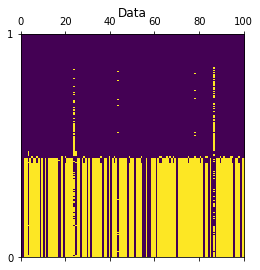

In [40]:
%matplotlib inline
plt.figure()
plot_nan(data)
plt.title("Data")
plt.show()

In [41]:
# Creo variable que cuenta los NA's de cada fila
data['NAN']=data.isnull().sum(axis=1)
data['NAN'].describe()

count    114321.000000
mean         44.589104
std          49.247104
min           0.000000
25%           1.000000
50%           2.000000
75%         101.000000
max         118.000000
Name: NAN, dtype: float64

In [42]:
# Dado que hay observaciones con una cantidad considerable de missing values, se decide eliminar aquellas que tengan más de 80 NAN
data=data.loc[data['NAN'] <= 80]

In [43]:
data

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v123,v124,v125,v126,v127,v128,v129,v130,v131,NAN
0,3,1,1.335739e+00,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,1.989780,3.575369e-02,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144e+00,1
2,5,1,9.438769e-01,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,2.477596,1.345191e-02,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472e+00,2
3,6,1,7.974146e-01,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,1.812795,2.267384e-03,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483e+00,1
6,12,0,8.998057e-01,7.312995,C,3.494148,9.946200,1.926070,1.770427,0.066251,...,1.992594,8.375832e-02,BJ,3.276100,1.623298,2.266575,0,2.263736,9.708730e-01,1
8,22,0,2.078651e+00,8.462619,NaN,3.739030,5.265636,1.573033,2.303371,0.015869,...,1.875560,1.865950e-02,S,1.159637,5.582865,1.105283,0,1.170731,3.333334e+00,4
9,23,1,1.144802e+00,5.880606,C,3.244469,9.538384,2.500001,1.559405,0.412610,...,4.896617,8.943653e-03,E,1.344550,1.601176,1.928009,0,3.174603,1.000000e+00,1
13,30,1,1.400267e+00,5.367204,C,4.122155,8.137188,2.983080,2.640249,0.211851,...,2.096062,5.459061e-07,AQ,1.731656,6.102516,1.388117,4,1.220911,1.878453e+00,2
14,31,1,2.260036e+00,14.693263,C,5.150750,8.554136,1.954626,2.931936,0.041446,...,1.836667,5.973979e-03,Z,3.242128,0.818063,2.400050,0,1.166666,2.857143e+00,1
16,33,1,6.228961e-01,7.024732,C,4.193688,6.288177,2.132436,3.198654,0.407525,...,2.812624,2.474223e-01,BJ,1.865530,3.345960,0.796533,0,1.389474,6.060615e-01,1
20,37,1,9.438780e-01,5.927194,C,4.404372,9.045057,2.551021,2.693878,0.085665,...,2.419037,1.847926e-02,U,1.884567,2.602041,1.959776,1,1.121212,1.351351e+00,2


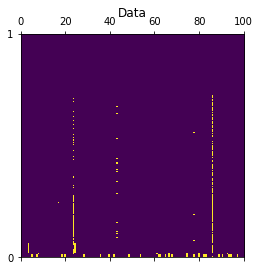

In [44]:
# Nuevamente se grafican los missing values para visualizar la nueva base
%matplotlib inline
plt.figure()
plot_nan(data)
plt.title("Data")
plt.show()

In [45]:
# Se cuentan los missing values de cada variable
mis=data.isnull().sum()
mis.sort_values(axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

v113      33782
v30       23843
v56        3578
v31        2774
v3         2774
v102       1520
v87         918
v105        913
v98         909
v70         891
v85         886
v119        884
v51         882
v123        882
v82         879
v109        879
v117        879
v81         879
v23         879
v5          879
v36         879
v128        879
v108        879
v25         874
v8          874
v89         874
v54         874
v46         874
v124        874
v63         874
          ...  
v2            0
target        0
v17           0
v4            0
NAN           0
v24           0
v74           0
v129          0
v114          0
v110          0
v107          0
v106          0
v101          0
v91           0
v79           0
v76           0
v75           0
v72           0
v38           0
v71           0
v66           0
v64           0
v62           0
v61           0
v59           0
v52           0
v48           0
v47           0
v44           0
ID            0
Length: 134, dtype: int6

In [46]:
# Se observan algunas variables con una cantidad considerable de missing values, por lo que se decide eliminar v113 y v30
columns = ['v30','v113']
data.drop(columns, inplace=True, axis=1)

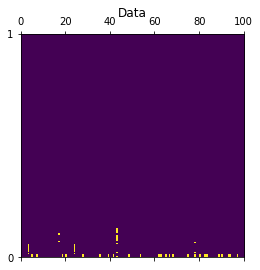

In [47]:
# Nuevamente se grafican los missing values para visualizar la nueva base
%matplotlib inline
plt.figure()
plot_nan(data)
plt.title("Data")
plt.show()

In [48]:
# Se cuentan los missing values de cada variable
mis=data.isnull().sum()
mis.sort_values(axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

v56       3578
v31       2774
v3        2774
v102      1520
v87        918
v105       913
v98        909
v70        891
v85        886
v119       884
v123       882
v51        882
v82        879
v108       879
v81        879
v23        879
v117       879
v109       879
v5         879
v128       879
v36        879
v25        874
v63        874
v8         874
v54        874
v124       874
v46        874
v89        874
v21        324
v22        230
          ... 
target       0
v2           0
v4           0
v17          0
NAN          0
v24          0
v74          0
v129         0
v114         0
v110         0
v107         0
v106         0
v101         0
v91          0
v79          0
v76          0
v75          0
v72          0
v38          0
v71          0
v66          0
v64          0
v62          0
v61          0
v59          0
v52          0
v48          0
v47          0
v44          0
ID           0
Length: 132, dtype: int64

In [49]:
cat = data
cat = cat.select_dtypes(include='object')
cat

,v3,v22,v24,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v125
0,C,XDX,C,A,C,G,DI,C,F,B,D,E,A,E,B,O,AU
2,C,FQ,E,A,C,F,AS,A,B,B,B,E,G,C,B,S,AE
3,C,ACUE,D,B,C,H,BW,A,F,B,D,B,B,B,B,J,CJ
6,C,NFD,E,A,C,A,AS,A,F,B,D,E,B,B,B,I,BJ
8,NaN,GKQ,E,NaN,D,H,AF,B,B,B,B,P,C,D,C,L,S
9,C,PYF,C,A,I,A,NaN,A,F,B,D,C,A,E,A,J,E
13,C,MVD,C,B,C,J,AL,A,F,B,D,B,G,C,B,E,AQ
14,C,QKP,E,A,C,G,AS,A,F,B,D,E,G,C,B,T,Z
16,C,NSV,E,A,I,F,NaN,B,F,B,D,C,C,D,A,I,BJ
20,C,IEE,C,B,C,K,BQ,A,F,B,D,B,A,E,B,D,U


In [50]:
# Se observan variables con un gran número de niveles, lo que dificulta el procesamiento. Por este motivo, se decide eliminarlas
cat.describe()

,v3,v22,v24,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v125
count,61751,64295,64525,61751,64525,64525,60947,64525,64525,64525,64525,64525,64525,64525,64525,64459,64509
unique,3,13448,5,3,9,12,114,3,6,3,3,17,7,7,3,22,89
top,C,AGDF,E,A,C,J,BW,A,F,B,D,C,A,E,B,F,BM
freq,61578,1419,26216,49338,33474,6265,6071,43234,42717,64181,42717,17626,15359,15359,33474,12579,3336


In [51]:
# Se eliminan variables con muchos niveles
col = ['v22','v56','v125']
data.drop(col, inplace=True, axis=1)

In [52]:
# Se elimina ID
data.drop('ID', inplace=True, axis=1)

In [53]:
# Se elimina NAN
data.drop('NAN', inplace=True, axis=1)

In [54]:
# Con la base depurada, se procede a hacer una imputación múltiple
import numpy as np
from sklearn.base import TransformerMixin
from fancyimpute import SimpleFill, KNN, MICE

class DataFrameImputer(TransformerMixin):
    NUMERIC     = 0x000100
    CATEGORICAL = 0x000200
    '''
    Parameters
    ----------
    imputer - a fancyimpute class with desired parameters
    copy    - whether you'd like to perform an inplace imputation or return a copy
              default returns a copy
    impute  - NUMERIC, CATEGORICAL kinds of imputataion
              default is imputation on only numeric columns
    '''
    def __init__(self, imputer = SimpleFill(), impute = NUMERIC, copy = True):
        self.imputer = imputer
        self.copy    = copy
        self.impute  = impute

    def fit(self, *_):
        return self
    
    def transform(self, data):
        columns     = data.columns
        numeric     = list(column for column in columns if data[column].dtype != 'object')
        categorical = list(column for column in columns if data[column].dtype == 'object')
        frame       = data.copy() if self.copy else data
        
        frame[numeric]     = frame[numeric].fillna(np.nan)
        frame[categorical] = frame[categorical].fillna('NA')
        
        try:
            if self.impute is DataFrameImputer.NUMERIC:
                nparray        = frame[numeric].as_matrix()
                frame[numeric] = self.imputer.complete(nparray)
        except ValueError:
            pass

        return frame

In [55]:
imputer = DataFrameImputer(imputer = MICE(verbose = False), copy = False)
imputer.fit_transform(data)

,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,1.0,1.335739e+00,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,...,0.803572,8.000000e+00,1.989780,3.575369e-02,1.804126,3.113719,2.024285,0.0,0.636365,2.857144e+00
2,1.0,9.438769e-01,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,...,2.238806,9.333333e+00,2.477596,1.345191e-02,1.773709,3.922193,1.120468,2.0,0.883118,1.176472e+00
3,1.0,7.974146e-01,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,...,1.956521,7.018256e+00,1.812795,2.267384e-03,1.415230,2.954381,1.990847,1.0,1.677108,1.034483e+00
6,0.0,8.998057e-01,7.312995,C,3.494148,9.946200,1.926070,1.770427,0.066251,5.011287,...,2.232558,3.476299e+00,1.992594,8.375832e-02,3.276100,1.623298,2.266575,0.0,2.263736,9.708730e-01
8,0.0,2.078651e+00,8.462619,NA,3.739030,5.265636,1.573033,2.303371,0.015869,11.111111,...,1.276595,8.148148e+00,1.875560,1.865950e-02,1.159637,5.582865,1.105283,0.0,1.170731,3.333334e+00
9,1.0,1.144802e+00,5.880606,C,3.244469,9.538384,2.500001,1.559405,0.412610,9.977529,...,2.715964,7.325843e+00,4.896617,8.943653e-03,1.344550,1.601176,1.928009,0.0,3.174603,1.000000e+00
13,1.0,1.400267e+00,5.367204,C,4.122155,8.137188,2.983080,2.640249,0.211851,11.021506,...,2.314931,8.817203e+00,2.096062,5.459061e-07,1.731656,6.102516,1.388117,4.0,1.220911,1.878453e+00
14,1.0,2.260036e+00,14.693263,C,5.150750,8.554136,1.954626,2.931936,0.041446,7.022901,...,1.505377,5.038168e+00,1.836667,5.973979e-03,3.242128,0.818063,2.400050,0.0,1.166666,2.857143e+00
16,1.0,6.228961e-01,7.024732,C,4.193688,6.288177,2.132436,3.198654,0.407525,10.434782,...,2.515245,6.086957e+00,2.812624,2.474223e-01,1.865530,3.345960,0.796533,0.0,1.389474,6.060615e-01
20,1.0,9.438780e-01,5.927194,C,4.404372,9.045057,2.551021,2.693878,0.085665,8.601036,...,1.840490,6.632125e+00,2.419037,1.847926e-02,1.884567,2.602041,1.959776,1.0,1.121212,1.351351e+00


In [56]:
# Se comprueba que no haya quedado ningún NAN
data.isnull().sum()

target    0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
v29       0
v31       0
         ..
v100      0
v101      0
v102      0
v103      0
v104      0
v105      0
v106      0
v107      0
v108      0
v109      0
v110      0
v111      0
v112      0
v114      0
v115      0
v116      0
v117      0
v118      0
v119      0
v120      0
v121      0
v122      0
v123      0
v124      0
v126      0
v127      0
v128      0
v129      0
v130      0
v131      0
Length: 127, dtype: int64

# Transformación de los datos

In [57]:
# Por facilidad en el modelamiento de los algoritmos de clasificación, se cambia el tipo de variable de target a integer
data['target']=data['target'].astype(int)
data['target'].dtypes

dtype('int32')

In [58]:
# Se convierten las variables categóricas en dummies
ddata=pd.get_dummies(data)
ddata

,target,v1,v2,v4,v5,v6,v7,v8,v9,v10,...,v112_N,v112_NA,v112_O,v112_P,v112_Q,v112_R,v112_S,v112_T,v112_U,v112_V
0,1,1.335739e+00,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,...,0,0,1,0,0,0,0,0,0,0
2,1,9.438769e-01,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,...,0,0,0,0,0,0,1,0,0,0
3,1,7.974146e-01,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,...,0,0,0,0,0,0,0,0,0,0
6,0,8.998057e-01,7.312995,3.494148,9.946200,1.926070,1.770427,0.066251,5.011287,2.341356,...,0,0,0,0,0,0,0,0,0,0
8,0,2.078651e+00,8.462619,3.739030,5.265636,1.573033,2.303371,0.015869,11.111111,4.463894,...,0,0,0,0,0,0,0,0,0,0
9,1,1.144802e+00,5.880606,3.244469,9.538384,2.500001,1.559405,0.412610,9.977529,2.363238,...,0,0,0,0,0,0,0,0,0,0
13,1,1.400267e+00,5.367204,4.122155,8.137188,2.983080,2.640249,0.211851,11.021506,1.816193,...,0,0,0,0,0,0,0,0,0,0
14,1,2.260036e+00,14.693263,5.150750,8.554136,1.954626,2.931936,0.041446,7.022901,1.291029,...,0,0,0,0,0,0,0,1,0,0
16,1,6.228961e-01,7.024732,4.193688,6.288177,2.132436,3.198654,0.407525,10.434782,1.312909,...,0,0,0,0,0,0,0,0,0,0
20,1,9.438780e-01,5.927194,4.404372,9.045057,2.551021,2.693878,0.085665,8.601036,3.916848,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# Se divide la muestra en train y test con las variables categóricas sin transformar
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.3)
print(train.shape)
print(test.shape)

(45167, 127)
(19358, 127)


In [60]:
# Se divide la muestra en train y test con las variables dummies
dtrain, dtest = train_test_split(ddata, test_size=0.3)
print(dtrain.shape)
print(dtest.shape)

(45167, 219)
(19358, 219)


In [69]:
# Se guarda la data imputada y dividida en train y test en formato csv
train.to_csv('train.csv', header=True)
test.to_csv('test.csv', header=True)

In [70]:
# Se guarda la data imputada y dividida en train y test en formato csv (dummies)
dtrain.to_csv('dtrain.csv', header=True)
dtest.to_csv('dtest.csv', header=True)

In [71]:
# Se separan las x y y de las dummies
X_dtrain=dtrain.copy()
X_dtrain.drop(['target'], inplace=True, axis=1)
X_dtrain

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v112_N,v112_NA,v112_O,v112_P,v112_Q,v112_R,v112_S,v112_T,v112_U,v112_V
46505,-4.166131e-07,15.437784,6.526468,9.045786,2.877526,3.329369,4.442869,5.882352,1.028446,15.023923,...,0,0,0,0,0,0,0,1,0,0
65034,3.270050e+00,5.232925,4.115625,7.800941,1.990180,2.821603,0.132195,10.170317,1.291028,14.513400,...,1,0,0,0,0,0,0,0,0,0
81419,8.316692e-01,4.316472,3.693577,9.393784,3.286714,2.222778,1.519167,8.690229,1.028447,15.948104,...,0,0,0,0,0,0,0,0,0,0
111232,2.011964e+00,5.051086,2.387601,8.855700,2.022838,2.403479,0.383798,8.554216,1.312910,14.028778,...,0,0,0,0,0,0,0,0,0,0
88643,1.180536e+00,3.348703,3.672835,9.373506,2.765221,2.105824,2.288841,10.254041,1.291029,15.556739,...,0,0,0,0,0,0,0,0,0,0
96367,3.954399e-01,13.733023,5.308956,10.263739,2.764518,2.550765,0.531785,5.937501,2.538294,16.385737,...,0,0,0,0,0,1,0,0,0,0
35202,1.442897e+00,9.814925,5.998562,7.770078,2.562673,2.551533,0.932377,6.422018,1.291028,15.221933,...,0,0,0,0,0,0,0,0,0,0
47786,2.522155e+00,3.604213,3.597512,8.084116,3.237901,2.171098,11.656060,9.043478,1.028445,14.861599,...,0,0,0,0,0,0,0,0,0,0
30105,2.463930e+00,9.886738,3.920656,8.006460,2.249353,2.360341,2.372273,10.322581,1.728664,14.379086,...,0,0,0,0,0,0,0,0,0,0
103527,1.014254e+00,9.388097,3.999319,8.352387,2.434211,2.160089,0.075574,10.645161,0.787745,16.312850,...,0,0,0,0,0,0,0,0,0,0


In [72]:
X_dtest=dtest.copy()
X_dtest.drop(['target'], inplace=True, axis=1)
X_dtest

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v112_N,v112_NA,v112_O,v112_P,v112_Q,v112_R,v112_S,v112_T,v112_U,v112_V
62301,2.169292e+00,3.600185,3.606152,9.827520,2.726274,2.308538,2.692593,6.901409,1.312909,16.319328,...,1,0,0,0,0,0,0,0,0,0
32865,1.741710e+00,5.379031,2.852733,10.172468,2.447809,1.788785,1.048858,9.030391,1.575492,15.649122,...,0,0,0,0,0,0,0,0,0,0
279,2.654059e+00,3.691744,2.250328,7.849370,1.356375,2.034562,7.746594,10.215827,1.291028,15.249042,...,0,0,0,1,0,0,0,0,0,0
90895,1.701584e+00,5.631104,3.652579,9.083187,2.064385,2.585590,0.649189,10.142181,5.229759,15.345030,...,0,0,0,0,0,0,0,0,0,0
33878,2.054739e+00,7.526024,3.035862,7.767736,1.792940,2.951211,0.261156,9.801699,1.969365,14.314050,...,0,0,0,0,0,0,0,0,0,0
67720,1.527743e+00,6.769273,5.172297,4.570677,2.425807,2.374194,3.716412,9.503999,3.916849,13.958103,...,0,0,0,0,0,0,0,0,0,0
46846,2.849285e+00,15.239455,4.340776,8.655011,2.376238,2.222222,0.037055,10.989011,1.838074,15.956989,...,0,0,0,0,0,0,0,0,0,0
10964,1.551362e+00,5.919526,5.189962,5.884331,2.487771,2.389938,0.065250,8.296297,1.291029,16.096000,...,0,0,0,0,0,0,0,0,0,0
23144,8.352144e-01,12.046325,4.235974,11.809012,2.148985,2.582392,0.086281,7.685590,0.787746,15.866261,...,0,0,0,0,0,1,0,0,0,0
13243,1.221122e+00,4.275303,4.079122,8.662994,3.241658,2.273562,0.514220,10.612244,1.050328,15.735736,...,1,0,0,0,0,0,0,0,0,0


In [73]:
y_dtrain=dtrain['target']
y_dtrain

46505     1
65034     1
81419     1
111232    0
88643     1
96367     1
35202     1
47786     1
30105     1
103527    1
41621     1
87074     1
75472     1
110615    1
24823     1
45855     1
60593     1
75585     1
38045     1
92133     1
31638     1
27346     1
12562     1
27797     1
103211    1
69551     0
58149     1
36088     0
87595     1
107983    1
         ..
22221     0
93824     1
6124      1
70454     0
108383    1
30788     1
82573     1
110688    1
72161     1
42301     1
51110     0
42204     1
71032     1
74716     0
44537     1
82460     0
81869     1
94659     0
19075     1
71536     1
34902     1
106625    1
60525     0
78870     1
70057     0
15428     1
82705     1
81091     1
91530     1
84136     1
Name: target, Length: 45167, dtype: int32

In [74]:
y_dtest=dtest['target']
y_dtest

62301     1
32865     1
279       1
90895     1
33878     0
67720     1
46846     0
10964     1
23144     1
13243     1
87039     1
38273     1
40506     1
57792     1
25109     0
48735     1
13540     1
95386     1
103909    1
75517     0
98134     0
20309     1
104329    1
102604    1
105980    1
53030     1
10623     0
5568      1
78914     1
43783     1
         ..
68651     1
73069     1
36311     0
63920     1
8798      1
74384     1
96822     1
30950     0
68119     1
60991     0
14871     1
73573     0
96067     1
86553     1
95941     1
32914     0
28571     0
24195     1
13520     1
84237     1
3802      1
1417      1
100983    1
93259     1
28109     1
23416     1
8934      1
102351    0
81097     1
45086     0
Name: target, Length: 19358, dtype: int32

In [75]:
# Se guarda la data dividida en train y test y en x y y en formato csv (dummies)
X_dtrain.to_csv('X_dtrain.csv', header=True)
X_dtest.to_csv('X_dtest.csv', header=True)
y_dtrain.to_csv('y_dtrain.csv', header=True)
y_dtest.to_csv('y_dtest.csv', header=True)

In [68]:
# Se observan las correlaciones entre predictores
rs = np.random.RandomState(0)
corr = data.corr()
corr.style.background_gradient()

In [93]:
datamod=data.copy()
col2=['v37','v106','v64','v105','v122','v12','v53','v21','v104','v86','v73','v32','v101','v93','v76','v64','v44','v65','v124','v89','v63','v54','v46','v8','v43','v60','v116','v96','v77','v67','v41','v55','v83','v84','v111','v121','v130','v114','v49','v29','v81','v51','v128','v108','v95','v103','v126','v118','v87','v94','v109','v128','v97','v119','v123']
datamod.drop(col2, inplace=True, axis=1)
datamod

,target,v1,v2,v3,v4,v5,v6,v7,v9,v10,...,v102,v107,v110,v112,v115,v117,v120,v127,v129,v131
0,1,1.335739e+00,8.727474,C,3.921026,7.915266,2.599278,3.176895,9.999999,0.503281,...,2.757375,E,B,O,2.857144,6.592012e+00,1.059603e+00,3.113719,0.0,2.857144e+00
2,1,9.438769e-01,5.310079,C,4.410969,5.326159,3.979592,3.928571,12.666667,0.765864,...,3.292788,C,B,S,12.941177,3.478911e+00,2.138728e+00,3.922193,2.0,1.176472e+00
3,1,7.974146e-01,8.304757,C,4.225930,11.627438,2.097700,1.987549,8.965516,6.542669,...,2.503055,B,B,J,10.574713,4.949609e+00,1.166281e+00,2.954381,1.0,1.034483e+00
6,0,8.998057e-01,7.312995,C,3.494148,9.946200,1.926070,1.770427,5.011287,2.341356,...,2.511898,B,B,I,8.543690,1.216872e+01,8.467161e-01,1.623298,0.0,9.708730e-01
8,0,2.078651e+00,8.462619,NA,3.739030,5.265636,1.573033,2.303371,11.111111,4.463894,...,1.780246,D,C,L,8.333332,3.419186e+00,1.414142e+00,5.582865,0.0,3.333334e+00
9,1,1.144802e+00,5.880606,C,3.244469,9.538384,2.500001,1.559405,9.977529,2.363238,...,3.694347,E,A,J,10.700001,1.071949e+01,4.347820e-01,1.601176,0.0,1.000000e+00
13,1,1.400267e+00,5.367204,C,4.122155,8.137188,2.983080,2.640249,11.021506,1.816193,...,1.204678,C,B,E,10.497238,2.769691e+00,2.401812e+00,6.102516,4.0,1.878453e+00
14,1,2.260036e+00,14.693263,C,5.150750,8.554136,1.954626,2.931936,7.022901,1.291029,...,2.623522,C,B,T,6.938776,7.711833e+00,9.651469e-01,0.818063,0.0,2.857143e+00
16,1,6.228961e-01,7.024732,C,4.193688,6.288177,2.132436,3.198654,10.434782,1.312909,...,1.702811,D,A,I,9.494949,4.817017e+00,6.931974e-01,3.345960,0.0,6.060615e-01
20,1,9.438780e-01,5.927194,C,4.404372,9.045057,2.551021,2.693878,8.601036,3.916848,...,2.998312,E,B,D,12.162162,5.233297e+00,1.937500e+00,2.602041,1.0,1.351351e+00


In [94]:
# Se convierten las variables categóricas en dummies
datamod=pd.get_dummies(datamod)
datamod

,target,v1,v2,v4,v5,v6,v7,v9,v10,v11,...,v112_N,v112_NA,v112_O,v112_P,v112_Q,v112_R,v112_S,v112_T,v112_U,v112_V
0,1,1.335739e+00,8.727474,3.921026,7.915266,2.599278,3.176895,9.999999,0.503281,16.434108,...,0,0,1,0,0,0,0,0,0,0
2,1,9.438769e-01,5.310079,4.410969,5.326159,3.979592,3.928571,12.666667,0.765864,14.756098,...,0,0,0,0,0,0,1,0,0,0
3,1,7.974146e-01,8.304757,4.225930,11.627438,2.097700,1.987549,8.965516,6.542669,16.347483,...,0,0,0,0,0,0,0,0,0,0
6,0,8.998057e-01,7.312995,3.494148,9.946200,1.926070,1.770427,5.011287,2.341356,16.274510,...,0,0,0,0,0,0,0,0,0,0
8,0,2.078651e+00,8.462619,3.739030,5.265636,1.573033,2.303371,11.111111,4.463894,16.050955,...,0,0,0,0,0,0,0,0,0,0
9,1,1.144802e+00,5.880606,3.244469,9.538384,2.500001,1.559405,9.977529,2.363238,16.091401,...,0,0,0,0,0,0,0,0,0,0
13,1,1.400267e+00,5.367204,4.122155,8.137188,2.983080,2.640249,11.021506,1.816193,15.594521,...,0,0,0,0,0,0,0,0,0,0
14,1,2.260036e+00,14.693263,5.150750,8.554136,1.954626,2.931936,7.022901,1.291029,15.837937,...,0,0,0,0,0,0,0,1,0,0
16,1,6.228961e-01,7.024732,4.193688,6.288177,2.132436,3.198654,10.434782,1.312909,15.545978,...,0,0,0,0,0,0,0,0,0,0
20,1,9.438780e-01,5.927194,4.404372,9.045057,2.551021,2.693878,8.601036,3.916848,16.280552,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# Se divide la muestra en train y test con las variables dummies
dnewtrain, dnewtest = train_test_split(datamod, test_size=0.3)
print(dnewtrain.shape)
print(dnewtest.shape)

(45167, 166)
(19358, 166)


In [96]:
# Se separan las x y y de la nueva data depurada
X_ntrain=dnewtrain.copy()
X_ntrain.drop(['target'], inplace=True, axis=1)
X_ntrain

,v1,v2,v4,v5,v6,v7,v9,v10,v11,v13,...,v112_N,v112_NA,v112_O,v112_P,v112_Q,v112_R,v112_S,v112_T,v112_U,v112_V
85778,2.017264,5.622861,3.206125,8.824122,3.271240,1.876419,9.027113,1.050329,15.271687,5.169825,...,0,0,0,0,0,0,0,0,0,0
71465,0.825432,6.750505,4.134805,7.347446,2.163971,2.621304,11.234568,1.816192,15.637756,3.531509,...,0,0,0,0,0,0,0,0,0,0
110209,0.917735,8.191393,4.150202,11.425689,2.232327,2.753203,10.406504,1.050328,15.684713,3.472868,...,0,0,0,0,0,0,0,0,0,0
38336,1.271477,11.625878,5.610547,9.139206,2.474227,2.474227,8.601037,5.229759,15.871559,3.016159,...,0,0,0,0,0,0,0,0,0,0
95915,2.365297,6.616004,2.933808,9.897205,2.283104,2.529681,8.104956,1.050327,14.656031,4.370381,...,0,0,0,0,0,0,0,0,0,0
59694,0.642733,5.133807,2.242248,8.006460,2.756225,1.991894,9.781023,3.916849,14.918415,5.336348,...,0,0,0,0,0,0,0,0,0,0
75537,3.333334,8.158347,4.237877,7.558843,2.702703,3.063063,8.837209,1.772428,15.338983,3.341746,...,0,0,1,0,0,0,0,0,0,0
19847,1.260647,11.266571,4.655670,7.168796,2.498581,2.986940,8.872180,4.704596,16.005362,2.693796,...,0,0,0,0,0,1,0,0,0,0
71120,3.024523,9.452824,4.413847,5.891056,3.378747,3.324250,11.724139,1.575492,15.771428,3.074863,...,0,0,0,1,0,0,0,0,0,0
45468,1.205213,11.426793,5.271406,14.599866,2.475571,2.224290,7.981221,0.787746,16.476283,2.956209,...,0,0,0,0,0,0,0,0,0,0


In [97]:
# Se separan las x y y de la nueva data depurada
X_ntest=dnewtest.copy()
X_ntest.drop(['target'], inplace=True, axis=1)
X_ntest

,v1,v2,v4,v5,v6,v7,v9,v10,v11,v13,...,v112_N,v112_NA,v112_O,v112_P,v112_Q,v112_R,v112_S,v112_T,v112_U,v112_V
41379,9.135807e-01,3.845985,2.216522,8.556752,2.059964,1.671958,3.444444,2.625821,13.568465,11.093827,...,0,0,0,0,0,0,0,0,0,0
65188,2.846153e+00,8.943657,4.393205,7.478144,3.384615,2.115384,10.731706,0.787746,16.679246,2.692584,...,0,0,0,0,0,0,0,0,0,0
17653,7.805902e-01,11.509363,5.656887,9.495628,1.856540,1.434599,8.000001,1.291027,15.390947,4.144266,...,0,0,0,0,0,0,0,0,0,0
74001,3.125659e+00,8.055718,3.582222,10.299588,2.083774,2.238649,9.177215,1.050327,15.790190,3.339509,...,0,0,0,0,0,0,0,0,0,0
59722,-5.352798e-07,9.015975,4.494128,7.457969,1.678321,3.216784,14.545455,1.291029,14.461538,2.338201,...,0,0,0,0,0,0,0,0,0,0
29188,2.117512e+00,6.167905,4.376721,8.535630,2.258681,2.502861,7.465181,4.967177,15.371025,3.795228,...,0,0,0,0,0,0,0,0,0,0
109767,9.552497e-01,3.368298,3.478830,9.631786,3.924268,2.203098,11.287128,0.787746,15.560439,2.868485,...,1,0,0,0,0,0,0,0,0,0
110621,3.674280e+00,13.348119,4.480657,9.184292,1.509434,2.442900,7.529413,2.603939,16.225491,2.324270,...,0,0,0,0,0,0,0,0,0,0
73528,3.422406e+00,6.964239,6.118082,10.356523,3.042139,3.412127,7.257142,1.312911,14.769667,3.379138,...,0,0,0,0,0,0,0,0,0,0
6461,1.563014e+00,4.877273,3.644791,9.119032,2.478291,2.088712,9.807163,1.291029,16.337611,2.976976,...,0,0,0,0,0,0,0,0,0,0


In [98]:
# Se guarda la nueva data sin variables con correlaciones altas dividida en train y test y en x y y en formato csv
X_ntrain.to_csv('X_ntrain.csv', header=True)
X_ntest.to_csv('X_ntest.csv', header=True)